In [1]:
import torch
from torch._six import int_classes as _int_classes
from torchvision import models

In [ ]:
dir(models)

In [3]:
alexnet = models.AlexNet()

In [ ]:
resnet = models.resnet101(pretrained=True)
resnet

In [5]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
)])

In [6]:
# In[7]:
from PIL import Image
img = Image.open("/content/pitbull.jpg")

In [7]:
img_t = preprocess(img)

In [8]:
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
resnet.eval()

In [ ]:
out = resnet(batch_t)
out

In [11]:
with open('/content/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [12]:
_, index = torch.max(out, 1)

In [13]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 
labels[index[0]], percentage[index[0]].item()

('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
 85.09428405761719)

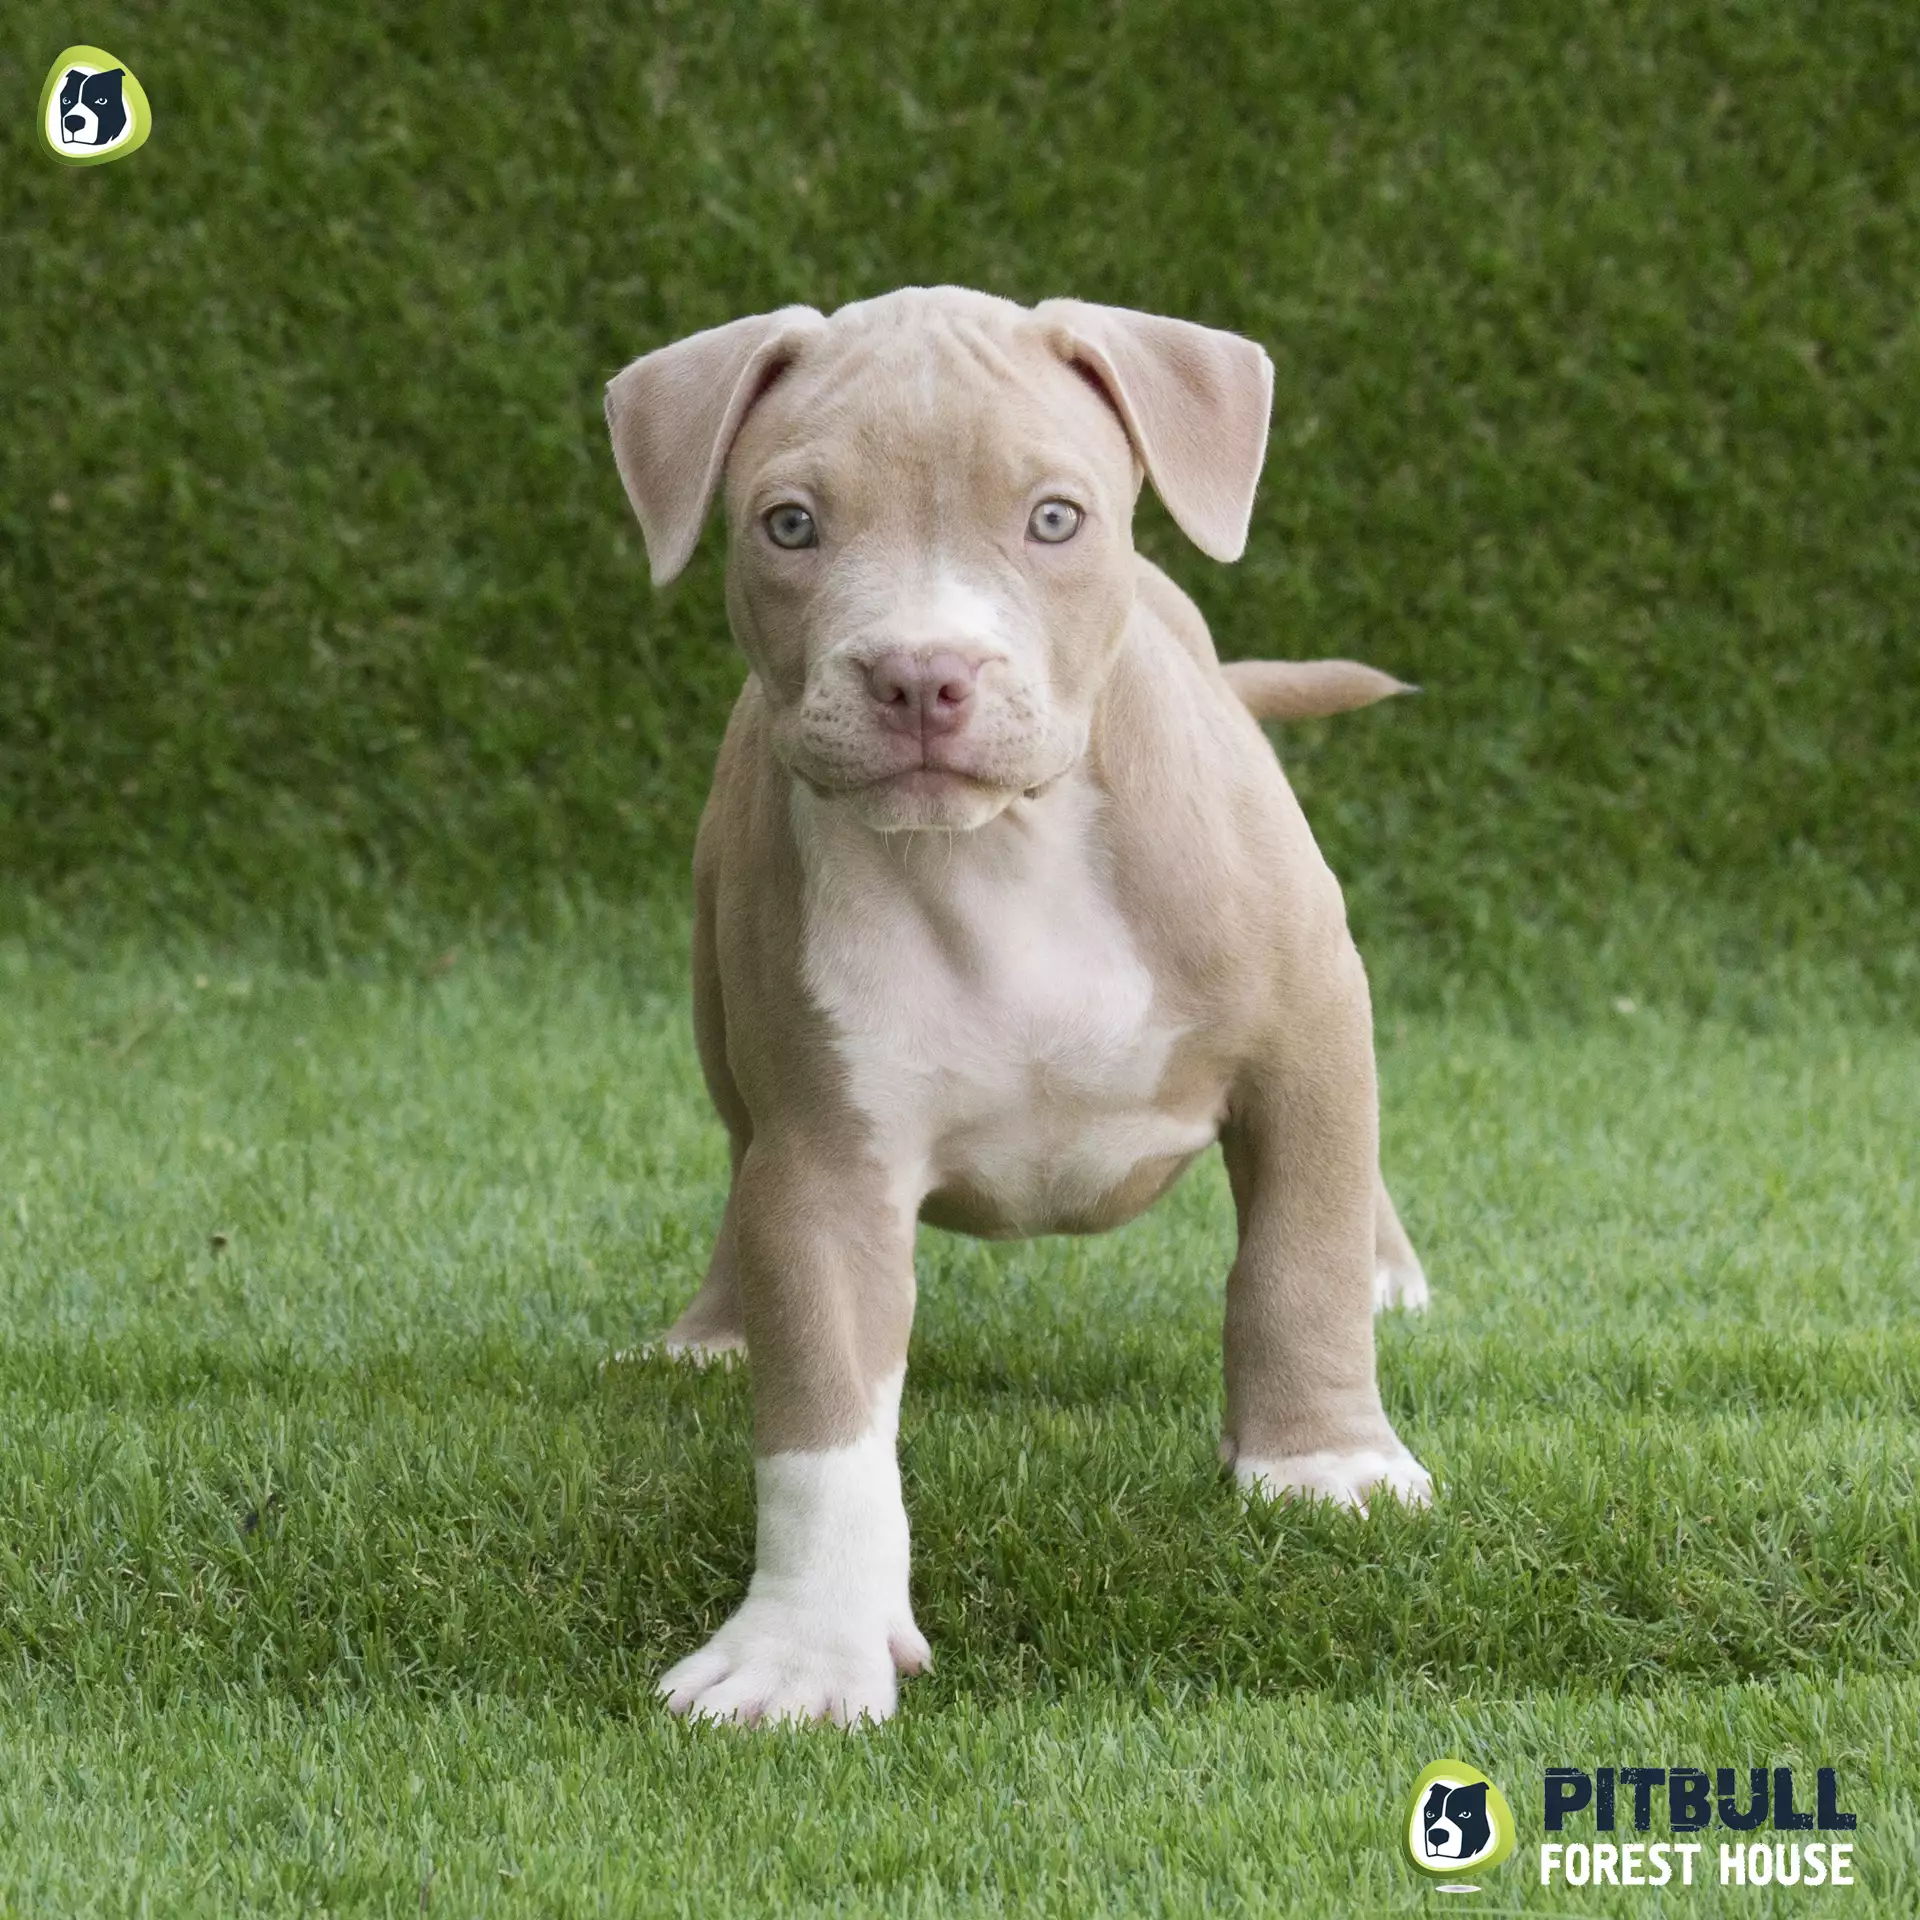

In [14]:
img

In [15]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
  85.09428405761719),
 ('Staffordshire bullterrier, Staffordshire bull terrier', 4.976935863494873),
 ('Weimaraner', 4.152560710906982),
 ('bull mastiff', 2.2924656867980957),
 ('Great Dane', 1.3127437829971313)]

In [16]:
from PIL import Image
img2 = Image.open("/content/giraffe.jpg")
img_t2 = preprocess(img2)
batch_t2 = torch.unsqueeze(img_t2, 0)
resnet.eval()
out2 = resnet(batch_t2)
_, index = torch.max(out2, 1)
percentage = torch.nn.functional.softmax(out2, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()


('impala, Aepyceros melampus', 40.71995162963867)

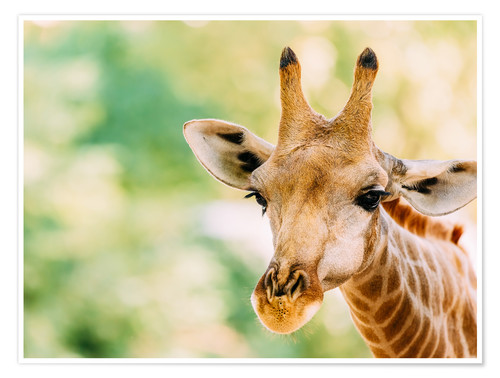

In [17]:
img2